In [0]:
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X_train = 
y_train = 
X_test = 
y_test = 

In [0]:
#--------------------- PCA ---------------------

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

imp.fit_transform(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [0]:
#----------------------------------------------- Random Search ---------------------------------

In [0]:
params = {
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
        'n_estimators': [10, 100, 150, 200, 300, 400, 500, 600],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8]
        }

In [0]:
xgb = XGBClassifier(objective='multi:softmax', silent=True, num_class=10)

In [0]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [0]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 31.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f4db9334af0>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None, num_cl...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05

In [0]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-50-AllDist_AllAngles.csv', index=False)


 All results:
{'mean_fit_time': array([102.22528801,  71.29785099, 160.93390679,   1.57802844,
        75.66828938,  85.22415962,  46.64241157, 185.65601969,
        64.59993424, 132.18343649,   2.31384516,  54.22586541,
        56.22920346,  24.52400088,  66.2002924 ,  19.74697633,
        42.26876397,  99.16706285,  59.55672936, 121.41194339]), 'std_fit_time': array([ 1.25343501,  0.86943178,  1.76694332,  0.17684624,  2.11517383,
        1.36447319,  0.81260982,  2.58817364,  0.72009057,  1.8614107 ,
        0.24150109,  0.50609508,  1.04684844,  0.23560922,  0.40828192,
        0.25946039,  0.53091937,  0.79763715,  0.38293142, 31.42556603]), 'mean_score_time': array([0.06705537, 0.07347198, 0.04906259, 0.01538591, 0.03435445,
       0.05553889, 0.03117046, 0.13532605, 0.07657762, 0.06254077,
       0.017413  , 0.04089494, 0.05179791, 0.04330616, 0.07295947,
       0.03722258, 0.03382602, 0.0435842 , 0.07004728, 0.02338767]), 'std_score_time': array([0.00847132, 0.00635546, 0.0115

In [0]:
preds = random_search.predict_proba(X_test)
results_df = pd.DataFrame(data={'action_class':y_test, 'prediction':preds[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-50-AllDist_AllAngles.csv', index=False)

In [0]:
yprob = bst.predict( Xtest ).reshape( ytest.shape[0], 100 )
ylabel = np.argmax(yprob, axis=1)

print ('predicting, classification error=%f' % \
       (np.sum( ylabel != ytest) / float(ytest.shape[0]) ))

NameError: ignored

In [0]:
y_test.shape

(350,)

In [0]:
#---------------- train model -------------------

In [0]:
train_model = XGBClassifier(subsample=, n_estimators=, min_child_weight=, max_depth=, learning_rate=, gamma=, colsample_bytree=, objective='multi:softmax', silent=True, num_class=10)


In [0]:
train_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.8, verbosity=1)

In [0]:
# pred1 = train_model1.predict(X_test)
preds = train_model.predict(X_test)

# print('Model 1 XGboost Report %r' % (classification_report(y_test, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test, preds)))

Model 2 XGboost Report '                precision    recall  f1-score   support\n\n  arms corssed       0.94      0.94      0.94        82\n       arms up       0.88      0.87      0.87        82\narms wide open       0.91      0.91      0.91        82\n hands on hips       0.97      0.90      0.94        82\n       neutral       0.88      0.95      0.91        82\n\n      accuracy                           0.91       410\n     macro avg       0.92      0.91      0.91       410\n  weighted avg       0.92      0.91      0.91       410\n'


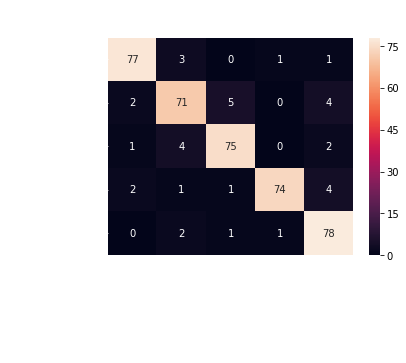

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

#clf = SVC(kernel = 'linear').fit(x_train,y_train)
#clf.predict(x_train)
#y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, preds) 

# Transform to df for easier plotting

cm_df = pd.DataFrame(cm, index = [["zero", "one", "two", "three", "five", "dislike", "like", "exactly", "left", "negative"],
                                 columns = ["zero", "one", "two", "three", "five", "dislike", "like", "exactly", "left", "negative"]])


plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('XGBoost - Joints Dist and Angles with PCA \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds))).set_color('white')
plt.ylabel('True label').set_color('white')
plt.xlabel('Predicted label').set_color('white')
#plt.xaxis.label.set_color('White')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

Model 2 XGboost Report '              precision    recall  f1-score   support\n\n     Sitting       0.88      0.89      0.88        90\n    Sleeping       0.92      0.83      0.87        41\n    Standing       0.74      0.73      0.73       111\n     Walking       0.71      0.73      0.72       108\n\n    accuracy                           0.78       350\n   macro avg       0.81      0.79      0.80       350\nweighted avg       0.78      0.78      0.78       350\n'

In [0]:
!nvidia-smi

Fri Aug  9 11:49:44 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  